# HR Analytics

## Discovering the factors that influence employee turnover
***

# Table of Contents:

[Objectives](#Objectives)



### Objectives:


# The Problem

This project aims to examine the possible causes of employee attrition based on available data. 
Attrition of employees can lead to increase of costs, lack of knowledgeable employees, increase in resources for training and hiring new employees. 
Identifying possible causes of attrition can help pinpoint the employees who are more likely to resign.

## Hypotheses



## Questions for EDA

1. Do employees with higher degrees have higher job and environment satisfaction?
2. How is performance correlated with work life balance and relationship satisfaction?
3. 

Dataset - https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
__author__ = "Vita Levytska"
__email__ = "levytska.vita@gmail.com"

## Load Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

In [4]:
def read_data(file):
    return pd.read_csv(file)

def drop_columns(df, col_list):
    data = df.drop(col_list, axis=1)
    return data

## Read and Display Data

In [5]:
df = read_data("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


# EDA

## See dtypes using .info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.shape

(1470, 35)

## Summarize the data

In [8]:
df.describe() #numerical columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.describe(include = ['O']) #categorical columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
col_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = drop_columns(df, col_list)

Dropped columns: Employee Count, Over18 and StandardHours since the values are the same for all rows; Employee Number (omitted but should be kept if we need to identify the current employees).

## Check for missing values

In [11]:
df.isnull().any() 

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

## Check for duplicates

In [12]:
df.duplicated().sum()

0

## Checking if the dataset is balanced

In [13]:
attrition_rate = df["Attrition"].value_counts() / 1470
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Since we have an imbalanced dataset, we will need to use Oversampling / Undersampling for modeling part.

Plot distribution of numeric data (univariate and pairwise joint distribution)
Plot count distribution of categorical data
Analyse time series of numeric data by daily, monthly and yearly frequencies

In [16]:
def plot_cat_vars(cat_var, df, cat_var_hue):
    g = sns.catplot(x=cat_var, col="Attrition", hue=cat_var_hue,
                data=df, kind="count",
                height=4, aspect=.7)
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [ ]:
df["age_group"] = pd.cut(x=df['Age'], bins=[0,20,30,40,50,60], labels=["under 20","20-30","30-40","40-50","50-60"])



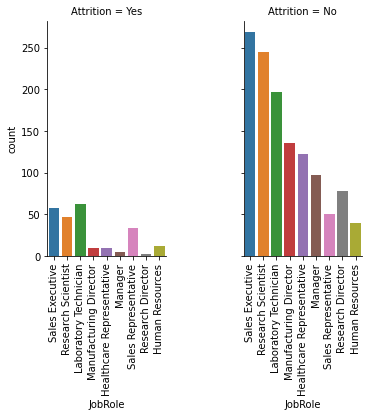

In [20]:
plot_cat_vars("JobRole",df)

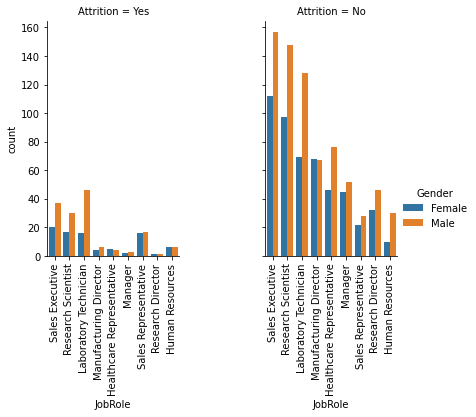

In [21]:
plot_cat_vars("JobRole",df, True)

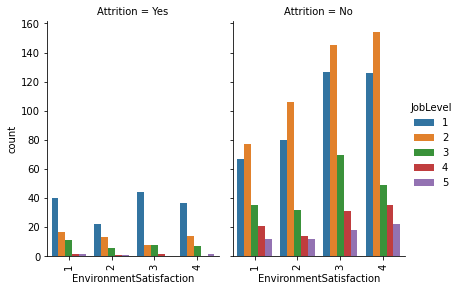

In [115]:
plot_cat_vars("EnvironmentSatisfaction", df, "JobLevel")

Employees are more likely to quit at entry level jobs regardless of their level of satisfaction.

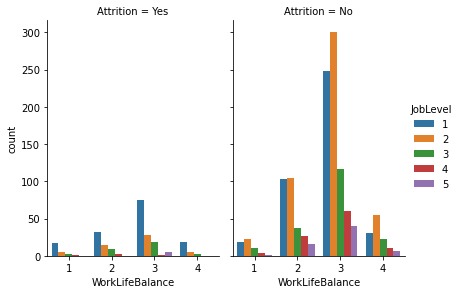

In [25]:
g = sns.catplot(x="WorkLifeBalance", hue="JobLevel", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7)

Employees are more likely to quit at entry level jobs regardless of their level of work life balance.

Employees who have entry level positions are more likely to leave company, thus should be targeted more. 

In [ ]:
#Analyze the employees at job level 1

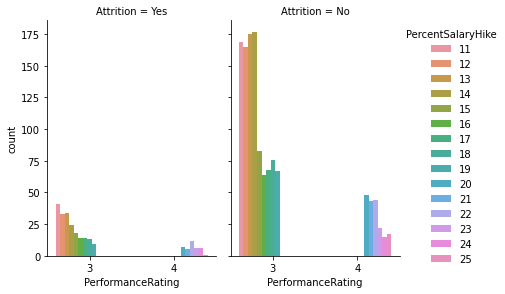

In [26]:
g = sns.catplot(x="PerformanceRating", hue="PercentSalaryHike", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7)

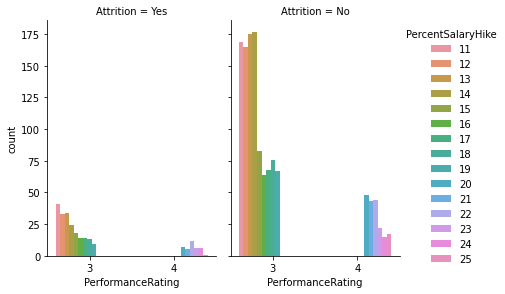

In [27]:
g = sns.catplot(x="PerformanceRating", hue="PercentSalaryHike", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7)

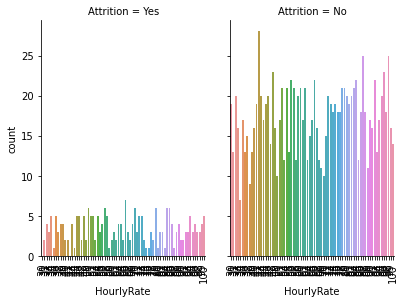

In [29]:
plot_cat_vars("HourlyRate",df,None)

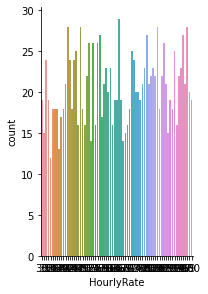

In [30]:
    g = sns.catplot(x="HourlyRate",
                data=df, kind="count",
                height=4, aspect=.7)

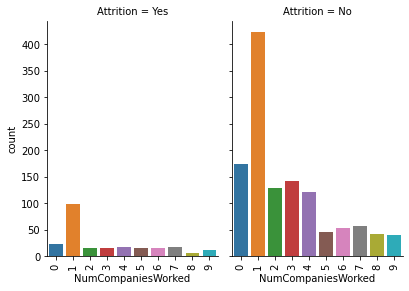

In [31]:
plot_cat_vars("NumCompaniesWorked",df,None)

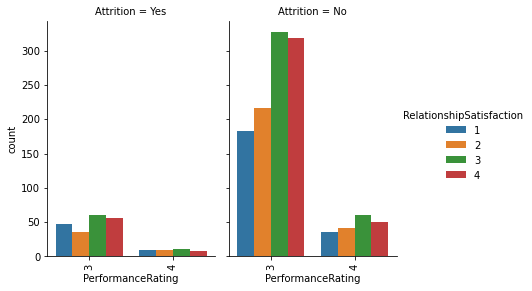

In [32]:
plot_cat_vars("PerformanceRating",df,"RelationshipSatisfaction")

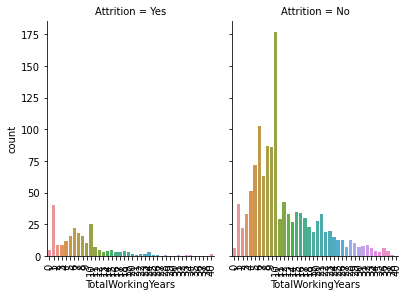

In [33]:
#TotalWorkingYears /WorkLifeBalance vs Attrition
plot_cat_vars("TotalWorkingYears",df,None
             )

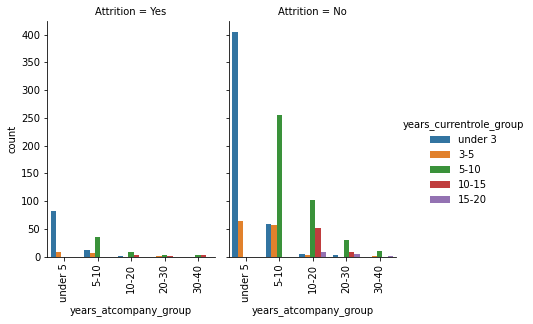

In [34]:
df["years_currentrole_group"] = pd.cut(x=df['YearsInCurrentRole'], bins=[0,3,5,10,15,20], labels=["under 3","3-5","5-10","10-15","15-20"])

df["years_atcompany_group"] = pd.cut(x=df['YearsAtCompany'], bins=[0,5,10,20,30,40], labels=["under 5","5-10","10-20","20-30","30-40"])

#YearsAtCompany vs YearsInCurrentRole / Attrition
plot_cat_vars("years_atcompany_group",df,"years_currentrole_group")

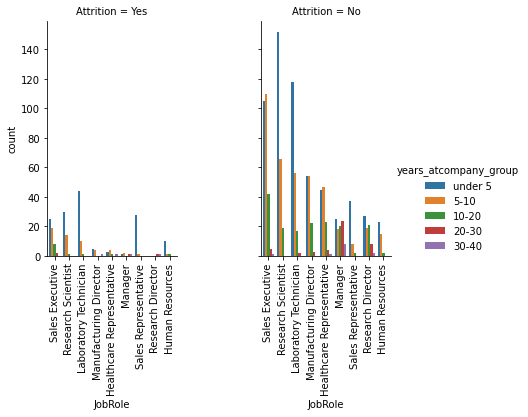

In [35]:
#JobRole vs YearsAtCompany / Attrition
plot_cat_vars("JobRole",df,"years_atcompany_group")

We see that employee attrition is more likely to happen at early stages of career as indicated by blue peaks on the graph on the left. Now let's explore the group under 5 years in more details.

In [36]:
df_under5 = df[df["years_atcompany_group"] == 'under 5']

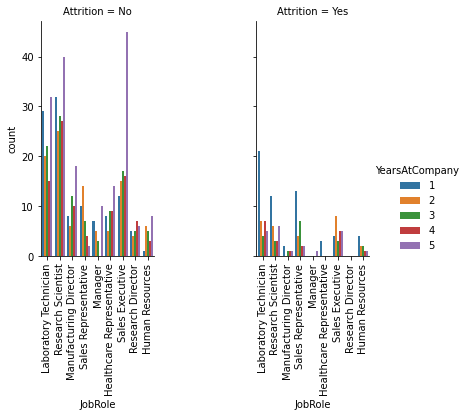

In [37]:
plot_cat_vars("JobRole",df_under5,"YearsAtCompany")

The employees who were in the company only for a year are more likely to quit than those who spent more than 3 year in the company.
Sales executives were more likely to stay in the company if worked for 5 years.

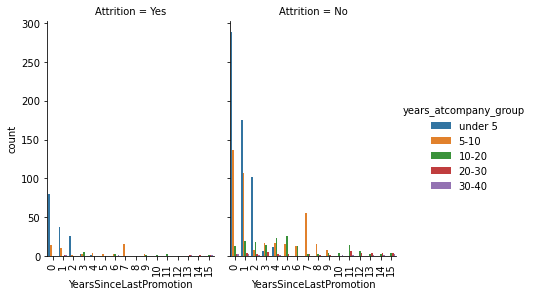

In [38]:
#YearsAtCompany / YearsSinceLastPromotion vs Attrition
plot_cat_vars("YearsSinceLastPromotion",df,"years_atcompany_group")

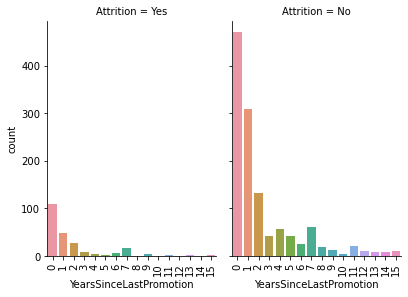

In [39]:
plot_cat_vars("YearsSinceLastPromotion",df, None)

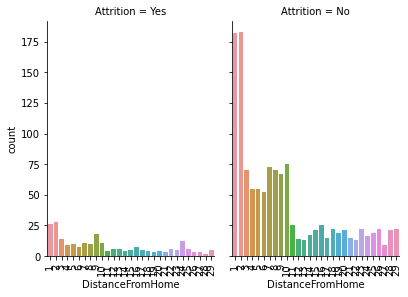

In [40]:
#DailyRate vs DistanceFromHome / Attrition
plot_cat_vars("DistanceFromHome",df, None)

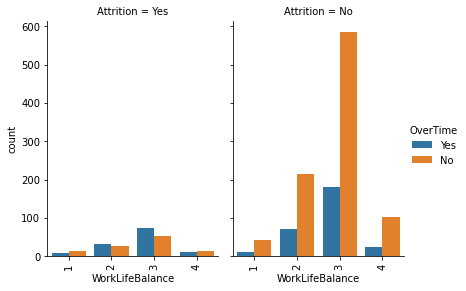

In [41]:
# WorkLifeBalance / OverTime vs Attrition

plot_cat_vars("WorkLifeBalance",df,"OverTime")

Those who do more overtime are more likely to quit even if they have good work life balance.
People who have good work-life balance do a lot less overtime. 

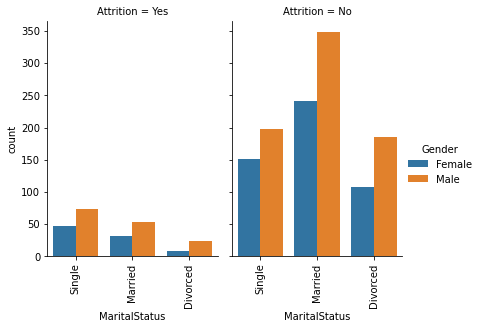

In [42]:
# MaritalStatus / Gender vs Attrition

plot_cat_vars("MaritalStatus",df,"Gender")

Single people are more likely to quit then married or divorced, for both male and female (left graph). Married are morelikely to stay (from graph on the right)

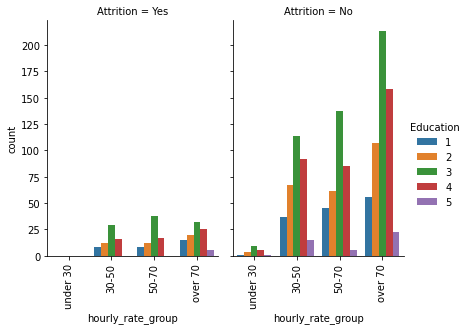

In [45]:
#Education vs HourlyRate
df["hourly_rate_group"] = pd.cut(x=df['HourlyRate'], bins=[0,30,50,70,110], labels=["under 30","30-50","50-70","over 70"])
plot_cat_vars("hourly_rate_group",df,"Education")

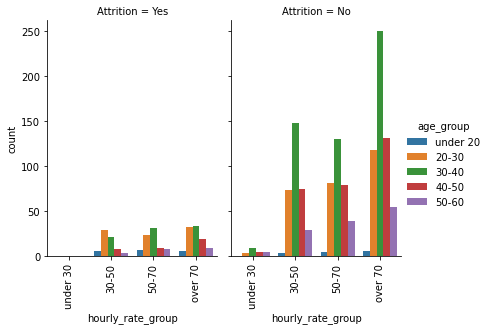

In [47]:
#Age vs HourlyRate

plot_cat_vars("hourly_rate_group",df,"age_group")

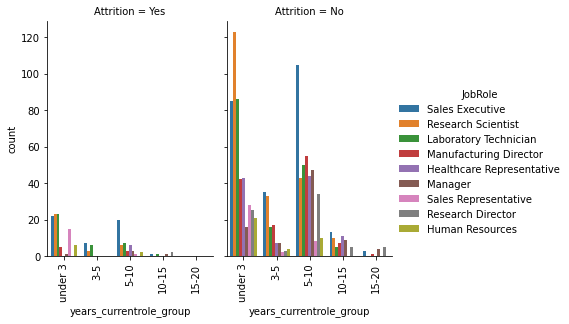

In [51]:
# JobRole YearsInCurrentRole vs Attrition

plot_cat_vars("years_currentrole_group",df,"JobRole")

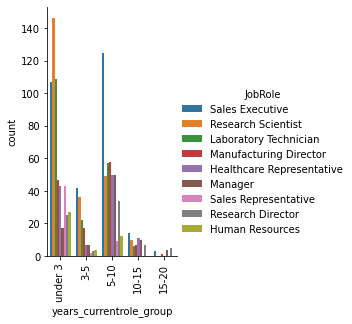

In [52]:
g = sns.catplot(x="years_currentrole_group", hue="JobRole",
                data=df, kind="count",
                height=4, aspect=.7)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

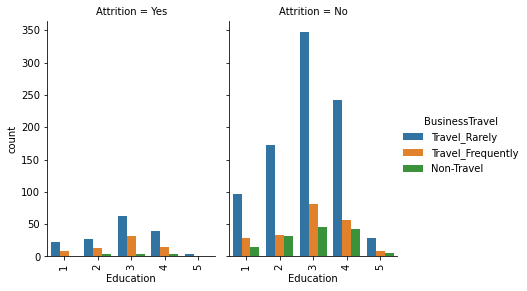

In [55]:
# BusinessTravel Department vs Attrition

plot_cat_vars("Education",df,"BusinessTravel")


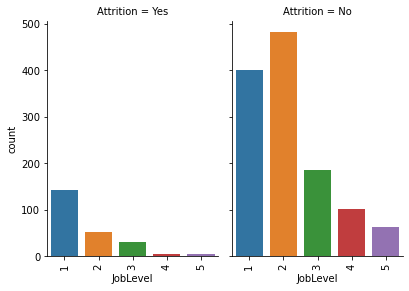

In [56]:
plot_cat_vars("JobLevel",df,None)

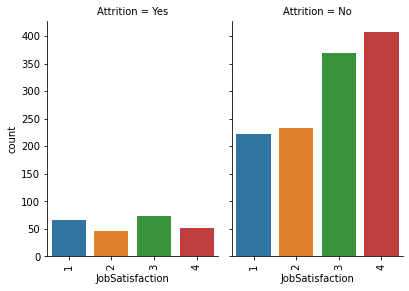

In [57]:
plot_cat_vars("JobSatisfaction",df,None)

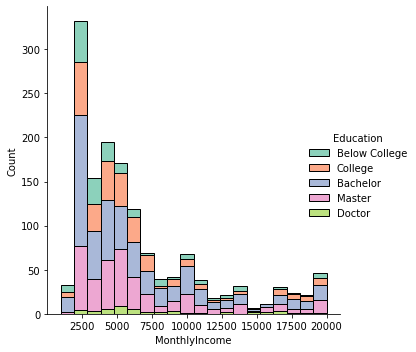

In [90]:
g = sns.displot(data = df, x= "MonthlyIncome", kde=False, palette="Set2", hue = "Education", multiple = "stack")
new_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [71]:
df_high_income = df[df["MonthlyIncome"] > 10000]

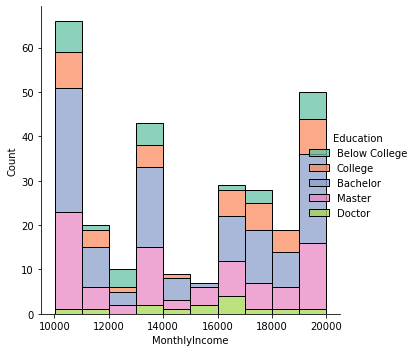

In [89]:
g = sns.displot(data = df_high_income, x= "MonthlyIncome", kde=False, palette="Set2", hue = "Education", multiple = "stack", legend = True)
new_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [114]:
numerical_vars = ['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears',
            'MonthlyIncome']
#                'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','HourlyRate', 'DailyRate',
#             'DistanceFromHome']
#sns.pairplot(x_vars = numerical_vars , y_vars =numerical_vars, data = df)

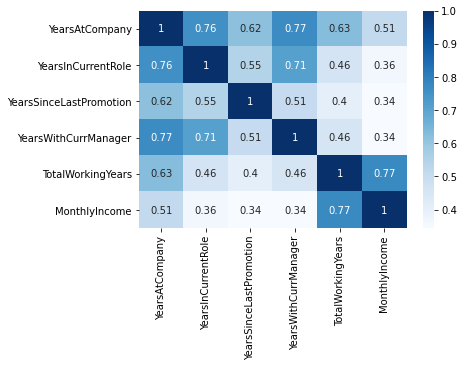

In [96]:
sns.heatmap(df[numerical_vars].corr(), cmap='Blues', annot=True)

Text(0.5, 1.0, 'Attrition = No')

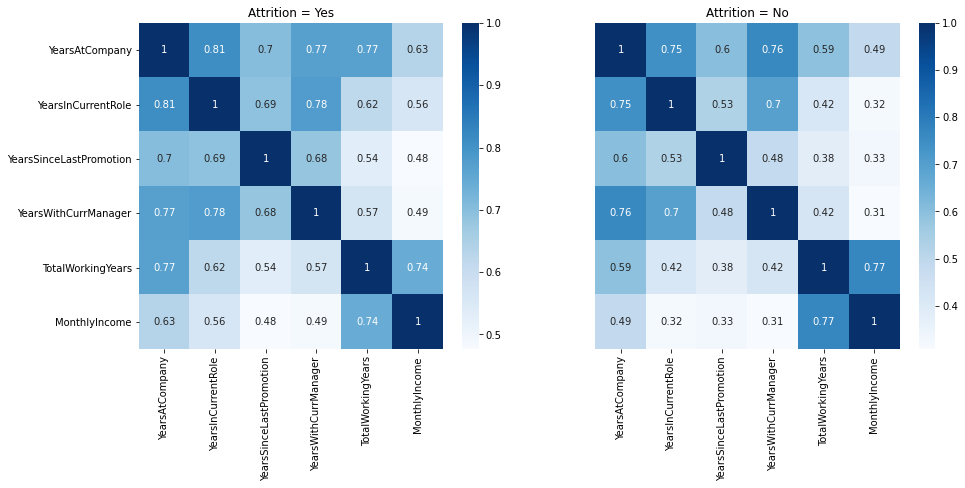

In [113]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.heatmap(df[df["Attrition"] == "Yes"][numerical_vars].corr(), cmap='Blues', annot=True, ax=ax[0])
sns.heatmap(df[df["Attrition"] == "No"][numerical_vars].corr(), cmap='Blues', annot=True, ax=ax[1], yticklabels = False)
ax[0].set_title("Attrition = Yes")
ax[1].set_title("Attrition = No")

# Limitations and Discussion

After examining the data, we see that _ % and _ % are medical and life sciences education field respectively, which make up the majority ( _ %) of our employees. Also highest percentage is in research and development. Thus more data is needed to be able to accurately predict employee turnout in different industries and education fields. 
There are internal and external causes of attrition, the scope of this analysis is limited to internal causes (based on data). 